## Composición de un Portafolio y backtesting 
### Adrián Vázquez 
#### 21/07/21

<B> Portafolio.  </B>

- Puede pensar en las carteras como un paquete de acciones individuales con diferentes pesos para cada posicion. 

- El rendimiento de una cartera es una combinación lineal de los pesos y los rendimientos de cada posición 

### <b> Calcular los rendimientos de la cartera. </b>

- Para construir y hacer un backtest de una cartera, tiene que sentirse cómodo trabajando con los rendimientos de múltiples activos en un solo objeto.

- En este ejercicio, se utilizará un objeto DataFrame de pandas, ya almacenado como la variable StockReturns, para mantener los rendimientos de múltiples activos y calcular los rendimientos de una cartera modelo.


- La cartera modelo se construye con ponderaciones predefinidas para algunas de las mayores  empresas del mundo justo antes de enero de 2017:

<b> NOTA: </b>

Tenga en cuenta que las ponderaciones de la cartera deben sumar el 100% en la mayoría de los casos


<table style="width:80%">
<tr>
<th>Company Name</th>
<th>Ticker</th>    
<th>  Portfolio Weight </th>
</tr>

<tr>
<td> Apple</td>
<td> AAPL</td>
<td> 12%</td>  
</tr>

<tr>
<td>Microsoft</td>
<td>MSFT</td>
<td> 15%</td>
</tr>
  

    
<tr>
<td>Exxon Mobil</td>
<td> XOM</td>
<td> 8%</td>
</tr>

<tr>
<td>Johnson & Johnson</td>
<td>JNJ</td>
<td> 15%</td>
</tr>
    
    
<tr>
<td>JP Morgan</td>
<td>JPM</td>
<td> 9%</td>
</tr>
    
<tr>
<td>Amazon</td>
<td>AMZN</td>
<td> 10%</td>
</tr>
   
<tr>
<td>General Electric</td>
<td>GE1l</td>
<td> 11%</td>
</tr><tr>
<td>Facebook</td>
<td>FB</td>
<td> 14%</td>
</tr>
    
<tr>
<td>AT&T</td>
<td>T</td>
<td> 16%</td>
</tr>

    
</table>

<b> Ejercicio.   </b>

- Termina de definir el array numpy de portfolio_weights del modelo con los valores según la tabla anterior.

- Utiliza el método .mul() para multiplicar los portfolio_weights a través de las filas de StockReturns para obtener los rendimientos ponderados de las acciones.

- A continuación, utilice el método .sum() a través de las filas del objeto WeightedReturns para calcular los rendimientos de la cartera.

- Por último, revise el gráfico de los rendimientos acumulados a lo largo del tiempo.

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [31]:
acciones_2017 = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv', index_col = 0 )

In [32]:
acciones_2017.columns

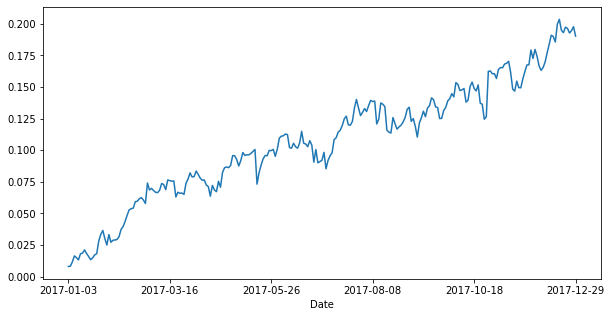

In [33]:
# Llenar el portafolio con el respectivo peso de cada acción dentro de el como 
# un numpy array
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, .14, .16])
# Calcular  rendimientos ponderados de cada acción 
WeightedReturns = acciones_2017.mul(portfolio_weights, axis=1)
# Calcular el rendimiento de la cartera 
acciones_2017['Portfolio'] = WeightedReturns.sum(axis=1)

# Graficar rendimientos acumulados atraves del tiempo. 

plt.figure(figsize = (10,5))
CumulativeReturns = ((1 + acciones_2017["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

#### <b> Carteras con igual ponderación. </b>

- Cuando se comparan diferentes carteras, a menudo se quiere considerar el rendimiento frente a una cartera ingenua de igual ponderación. Si la cartera no se comporta mejor que una cartera ponderada equitativamente simple, es posible que desee considerar otra estrategia, o simplemente optar por el enfoque ingenuo si todo lo demás falla. Es de esperar que las carteras igualmente ponderadas tiendan a superar al mercado cuando las empresas más grandes lo hacen mal. Esto se debe a que incluso las empresas más pequeñas tendrían el mismo peso en su cartera igualmente ponderada que Apple o Amazon, por ejemplo.


<b> Ejercicio. </b>

- Establezca numstocks igual a 9, que es el número de acciones en su cartera.

- Utilice np.repeat() para establecer portfolio_weights_ew igual a una matriz con pesos iguales para cada una de las 9 acciones.

- Utilice el accesorio .iloc para seleccionar todas las filas y las primeras 9 columnas al calcular la rentabilidad de la cartera.

- Por último, revise el gráfico de los rendimientos acumulados a lo largo del tiempo.

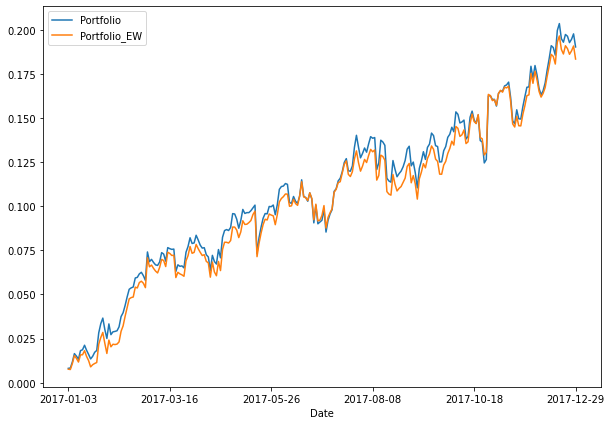

In [34]:
# Numero de acciones en el portafolio 
numstocks = 9
# matriz igual 
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# Calcular la rentabilidad de la cartera
acciones_2017['Portfolio_EW'] = acciones_2017.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

#Rendimientos acumulados atraves del tiempo 
acciones_ew = ((1 + acciones_2017["Portfolio_EW"]).cumprod()-1)

#Graficando 
plt.figure(figsize = (10,7))
CumulativeReturns.plot()
acciones_ew.plot()
plt.legend(loc = 'upper left')
plt.show()

<b> Carteras ponderadas por la capitalización bursátil. </b>

- Por el contrario, cuando las grandes empresas van bien, las carteras ponderadas por la capitalización del mercado tienden a obtener mejores resultados. Esto se debe a que las mayores ponderaciones se asignan a las empresas más grandes, o a las empresas con mayor capitalización bursátil.

- A continuación se muestra una tabla de las capitalizaciones de mercado de las empresas de su cartera justo antes de enero de 2017:


<table style="width:80%">
<tr>
<th>Company Name</th>
<th>Ticker</th>    
<th>  Market cap ( Billions ) </th>
</tr>

<tr>
<td> Apple</td>
<td> AAPL</td>
<td> 601.51</td>  
</tr>

<tr>
<td>Microsoft</td>
<td>MSFT</td>
<td> 469.25</td>
</tr>
  
<tr>
<td>Exxon Mobil</td>
<td> XOM</td>
<td> 349.5</td>
</tr>

<tr>
<td>Johnson & Johnson</td>
<td>JNJ</td>
<td> 310.48</td>
</tr>
    
    
<tr>
<td>JP Morgan</td>
<td>JPM</td>
<td> 299.77</td>
</tr>
    
<tr>
<td>Amazon</td>
<td>AMZN</td>
<td> 299.77</td>
</tr>
   
<tr>
<td>General Electric</td>
<td>GE1l</td>
<td>  268.88</td>
</tr><tr>
<td>Facebook</td>
<td>FB</td>
<td> 331.57</td>
</tr>
    
<tr>
<td>AT&T</td>
<td>T</td>
<td> 246.09</td>
</tr>

<b> Ejercicio.  </b>

- Terminar de definir la matriz market_capitalizations de capitalizaciones de mercado en miles de millones según la tabla anterior.

- Calcule la matriz mcap_weights de manera que cada elemento sea la relación entre la capitalización de mercado de la empresa y la capitalización de mercado total de todas las empresas.

- Utilice el método .mul() en mcap_weights y returns para calcular la rentabilidad de la cartera ponderada por capitalización bursátil.

- Por último, revise el gráfico de los rendimientos acumulados a lo largo del tiempo.


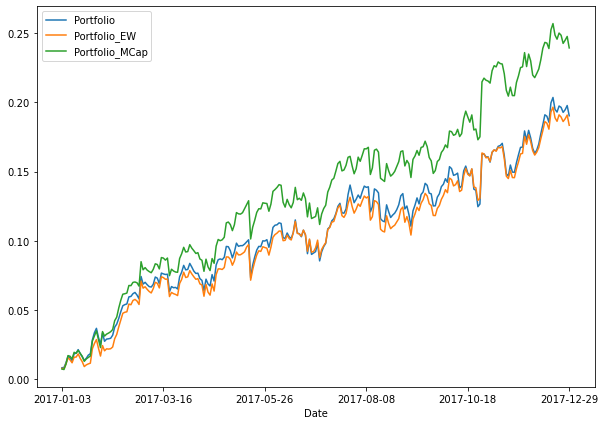

In [35]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])
# Calculate the market cap weights
mcap_weights = market_capitalizations / sum(market_capitalizations)
# Calculate the market cap weighted portfolio returns
acciones_2017['Portfolio_MCap'] = acciones_2017.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)

#Rendimientos acumulados atraves del tiempo 
portafrolio_Mcap= ((1 + acciones_2017['Portfolio_MCap']).cumprod()-1)


#Graficando 
plt.figure(figsize = (10,7))
CumulativeReturns.plot()
acciones_ew.plot()
portafrolio_Mcap.plot()
plt.legend(loc = 'upper left')
plt.show()

### Correlación y Covarianza

<b> La matriz de correlaciones. </b>

- La matriz de correlación se puede utilizar para estimar la relación lineal histórica entre los rendimientos de múltiples activos. Puede utilizar el método incorporado .corr() en un DataFrame de pandas para calcular fácilmente la matriz de correlación.

- La correlación va de -1 a 1. La diagonal de la matriz de correlación es siempre 1, porque una acción siempre tiene una correlación perfecta consigo misma. La matriz es simétrica, lo que significa que el triángulo inferior y el triángulo superior de la matriz son simplemente reflejos el uno del otro, ya que la correlación es una medida bidireccional.

- Utilizarás la biblioteca seaborn para generar un mapa de calor.

<b> Ejercicio. </b> 

- Calcula la matriz de correlación del DataFrame StockReturns.

- Importar seaborn como sns.

- Utilice la función heatmap() de seaborn para crear un mapa de correlación_matriz.

In [44]:
acciones_2017_headmap = acciones_2017.drop(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'], axis = 1)

correlation_matrix = acciones_2017_headmap.corr()
correlation_matrix

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914,0.509472,0.006766,0.542367,0.005082
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248,0.621096,-0.044827,0.543341,-0.021079
XOM,0.055505,0.084108,1.000000,0.121012,0.305926,0.015118,0.193861,-0.046813,0.197576
JNJ,0.038432,0.230215,0.121012,1.000000,0.070328,0.052781,0.067930,0.079391,0.091622
JPM,0.199914,0.191248,0.305926,0.070328,1.000000,0.013919,0.257401,0.095245,0.252832
AMZN,0.509472,0.621096,0.015118,0.052781,0.013919,1.000000,-0.092188,0.653030,-0.017909
GE,0.006766,-0.044827,0.193861,0.067930,0.257401,-0.092188,1.000000,-0.024364,0.292706
FB,0.542367,0.543341,-0.046813,0.079391,0.095245,0.653030,-0.024364,1.000000,-0.024505
T,0.005082,-0.021079,0.197576,0.091622,0.252832,-0.017909,0.292706,-0.024505,1.000000


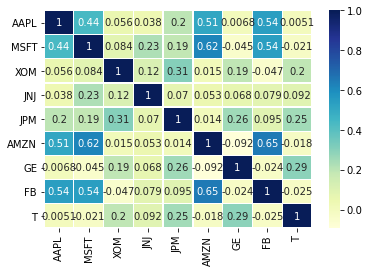

In [45]:

import seaborn as sns 
# Crear un  heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 10})
#  Añadimos etiquetas
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

<b> Conclusión </b>

- Obsérvese que Amazon está más correlacionado con Facebook y Microsoft. La matriz de correlaciones es muy útil para diversos métodos de análisis cuantitativo de las inversiones.

### <b>La matriz de covarianza. </b>


- Puede calcular fácilmente la matriz de covarianza de un DataFrame de rendimientos utilizando el método .cov().

- La matriz de correlaciones no le dice realmente nada sobre la varianza de los activos subyacentes, sólo las relaciones lineales entre los activos. La matriz de co-varianza (también conocida como varianza-covarianza), por otro lado, contiene toda esta información, y es muy útil para la optimización de la cartera y la gestión del riesgo.


<b> Ejercico. </b>

- Calcular la matriz de co-varianza del DataFrame StockReturns.

- Anualice la matriz de co-varianza multiplicándola por 252, el número de días de negociación en un año.

In [48]:
# Calcular la matriz de covarianza 
cov_mat = acciones_2017_headmap.cov()
# Anualizar la matriz de covarianza 
cov_mat_annual = cov_mat * 252
# Imprimir 
cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


### <b> Desviación estándar de la cartera. </b>

- Para calcular la volatilidad de la cartera, necesitarás la matriz de covarianza, los pesos de la cartera y conocer la operación de transposición. La transposición de una matriz de numpy se puede calcular utilizando el atributo .T. La función np.dot() es el producto punto de dos matrices.

- La fórmula de la volatilidad de la cartera es

$ \sigma Portafolio = \sqrt{ {w_T} * \sum{} * w } $

-  $ \sigma Portafolio  $:  Volatilidad de la cartera
 
- $ \sum{} $:   Matriz de covarianza de los rendimientos

- w :  Pesos de la cartera ( es la transposición de los pesos de la cartera)

- $ * $:   El operador de multiplicación de puntos




<b> Ejercicio.  </b>

- Calcule la volatilidad de la cartera asumiendo que utiliza el portfolio_weights siguiendo la fórmula anterior.

In [52]:
# Desviación estandar de la cartera
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, 
                                      np.dot(cov_mat_annual, portfolio_weights)))

print(portfolio_volatility)


0.08931417642713807


<b> Conclusión: </b>

- Esto fue un monstruo. La volatilidad de la cartera es del 8,93%

### <b> Ratios de Sharpe. </b>

- El ratio de Sharpe es una métrica sencilla de rentabilidad ajustada al riesgo de la que fue pionero William F. Sharpe. El ratio de Sharpe es útil para determinar cuánto riesgo se asume para lograr un determinado nivel de rentabilidad. En finanzas, siempre se busca la forma de mejorar el ratio de Sharpe, y la medida se cita y se utiliza muy a menudo para comparar estrategias de inversión.

El cálculo original del ratio de Sharpe de 1966 es bastante sencillo:

### $ S = \frac{R_{a} - r_{f}}{\sigma_{a}}    $

  - S: Ratio de Sharpe

  - $R_{a}$ : Rendimiento del activo

-   $ r_{f} $ : Tasa de rendimiento sin riesgo

-   $ \sigma_{a} $: Volatilidad de los activos

In [59]:
RandomPortfolios = pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/85e2663a50d3445cbc2c2d30ac81abbaae6a7f56/EfficientFrontierPortfoliosSlim.csv')
RandomPortfolios.head()

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473


<b> Ejercicio. </b>

- Asuma una tasa libre de riesgo de 0 para este ejercicio.

- Calcule el ratio de Sharpe para cada activo restando la tasa libre de riesgo de los rendimientos y dividiendo por la volatilidad.

In [60]:
# Risk free rate
risk_free = 0
# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] 
- risk_free)/ RandomPortfolios['Volatility'] 
# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])


min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


<b> Conclusión. </b>

- Bill Sharpe estaría orgulloso. Los ratios de Sharpe históricos de la cartera oscilan entre 0,742 y 2,27.

### <b>La cartera MSR. </b>

- La cartera con el máximo ratio de Sharpe, o MSR, que se encuentra en el vértice de la frontera eficiente, puede construirse buscando la cartera con el mayor ratio de Sharpe.

- <b> NOTA </b>

Por desgracia, la cartera MSR suele ser bastante errática. Aunque la cartera haya tenido un elevado ratio de Sharpe histórico, no garantiza que la cartera vaya a tener un buen ratio de Sharpe en el futuro.


<B> Ejercicio </B>

- Ordena las carteras aleatorias con el valor de Sharpe más alto, en orden descendente.

- Multiplique MSR_weights_array por las filas de StockReturns para obtener los rendimientos ponderados de las acciones.

- Por último, revise el gráfico de los rendimientos acumulados a lo largo del tiempo.

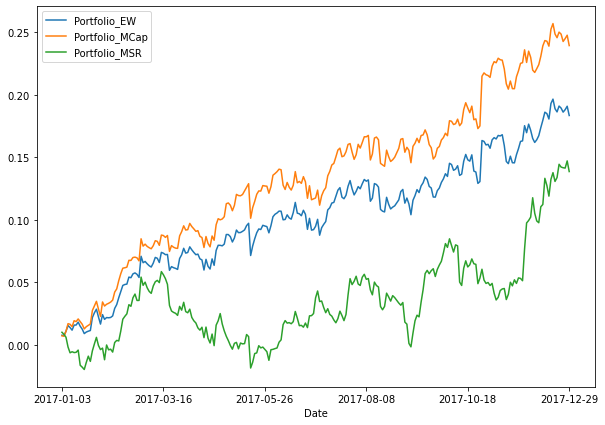

In [65]:
# Ordenamos las carteras de forma descendente atraves de el valor sharpe mas alto 
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending= False)

# Extraemos los pesos correspondidos 
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Convetimos en arreglo 
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
acciones_2017['Portfolio_MSR'] = acciones_2017.iloc[:, 0:numstocks].mul( MSR_weights_array, 
                                                                        axis=1).sum(axis=1)

#Rendimientos acumulados atraves del tiempo 
portafrolio_MSR= ((1 + acciones_2017['Portfolio_MSR']).cumprod()-1)


#Graficando 
plt.figure(figsize = (10,7))
acciones_ew.plot()
portafrolio_Mcap.plot()
portafrolio_MSR.plot()
plt.legend(loc = 'upper left')
plt.show()

<b> Conclusión. </b>

- Acaba de optimizar su primera cartera, pero el rendimiento pasado no garantiza los resultados futuros. Los rendimientos son más difíciles de predecir, lo que hace que el MSR sea inestable.

### <b> La cartera GMV. </b>

- La cartera de volatilidad mínima global, o cartera GMV, es la cartera con la menor desviación estándar (riesgo) y la mayor rentabilidad para un nivel de riesgo determinado.

- Los rendimientos son muy difíciles de predecir, pero las volatilidades y correlaciones tienden a ser más estables en el tiempo. Esto significa que la cartera GMV a menudo supera a las carteras MSR fuera de la muestra aunque la MSR la supere de forma bastante significativa dentro de la muestra. Por supuesto, los resultados fuera de muestra son los que realmente importan en finanzas.

<b> Ejercicio. </b>

- Ordenar RandomPortfolios con el valor de volatilidad más bajo, clasificando en orden ascendente.

- Multiplique GMV_weights_array por las filas de StockReturns para obtener los rendimientos ponderados de las acciones.

- Por último, revise el gráfico de los rendimientos acumulados a lo largo del tiempo.

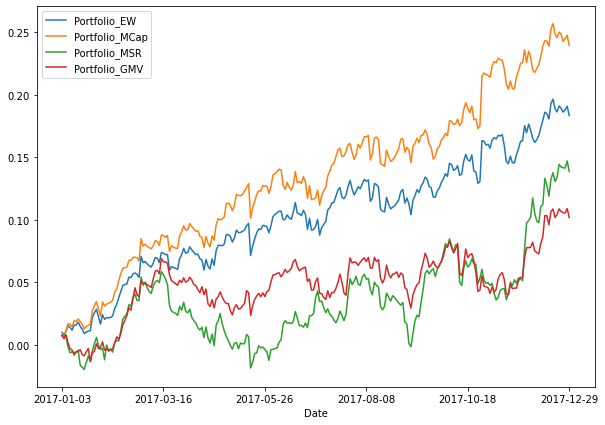

In [68]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending= True )
# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]
# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)
# Calculate the GMV portfolio returns
acciones_2017['Portfolio_GMV'] = acciones_2017.iloc[:, 0:numstocks].mul( GMV_weights_array, axis=1).sum(axis=1)

#Rendimientos acumulados atraves del tiempo 
portafrolio_GMV= ((1 + acciones_2017['Portfolio_GMV']).cumprod()-1)


#Graficando 
plt.figure(figsize = (10,7))
acciones_ew.plot()
portafrolio_Mcap.plot()
portafrolio_MSR.plot()
portafrolio_GMV.plot()
plt.legend(loc = 'upper left')
plt.show()



<b> Conclusión. </b>

- La cartera GMV tiende a ser la optimización más estable a lo largo del tiempo, pero por supuesto se puede esperar que una cartera de menor volatilidad tenga una rentabilidad menor que el método de ponderación de la capitalización de mercado de referencia.